# __Projet Maths-Info #3 : Câble sous-marin__

Binôme: Julien LAVAL et Nathan LINÉ.

Ce notebook développe un code qui permet d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes A et B, à l'aide d'une simulation conditionnelle.

Tout d'abord, on importe les librairies Python dont on aura besoin : 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rd

## Questions théoriques :

1) Les $(l_{(k)})_{k \leq K}$ sont des réalisations de variables aléatoires indépendantes identiquement distribuées, qui suivent la même loi et qui admettent une espérance (car $L$* existe).  
Ainsi, la __loi forte des grands nombres__ nous autorise à estimer l'espérance conditionnelle $L$* par la moyenne empirique des $(l_{(k)})_{k \leq K}$.  
Elle assure une convergence presque-sure de cette moyenne empirique vers $L$*.

2) $\textbf{Z}$ est un vecteur aléatoire gaussien, de vecteur d'espérance $M = (\mu, ..., \mu)$ et de matrice de covariance $\Sigma = (\sigma_{ij})_{i,j \leq N}$.  
  
On note $\textbf{Z} = (Z_1, Z_2)$ avec $Z_1$ points sans observations, $Z_2$ points avec observations.  
On a alors $M = (m_1, m_2), \;\Sigma = 
\begin{pmatrix}
\Sigma_{Z_1} & \Sigma_{Z_1, Z_2} \\
\Sigma_{Z_2, Z_1} & \Sigma_{Z_2}
\end{pmatrix}.$  
  
Alors, $(Z_1 | Z_2 = z)$ est une gaussienne  d'espérance $m_{Z_1|Z_2 = z} = m_{Z_1} + \Sigma_{Z_1, Z_2} \Sigma_{Z_2}^{-1} (z-m_{Z_2})$,  
et de matrice de covariance $\Sigma_{Z_1|Z_2 = z} = \Sigma_{Z_1} - \Sigma_{Z_1, Z_2} \Sigma_{Z_2}^{-1} \Sigma_{Z_2, Z_1}$.

Dans la suite, on pourra utiliser ce résultat même si les composantes connues du vecteur ne sont pas toutes à la fin. En effet, en extrayant les bonnes lignes et colonnes on obtient la matrice de covariance que l'on aurait si le vecteur Z était réorganisé avec d'abord les indices de position inconnus par ordre croissant, puis les indices connus par ordre croissant à la fin.

3) Si $R$ est une matrice constante et $Y$ un vecteur aléatoire gaussien, alors $RY$ est un vecteur aléatoire gaussien.  
  
En effet, on pose $R = (R_{ij})_{i,j \leq p}\,, \; m = \,^t (m_1, ..., m_p)$ et $Y = \,^t (Y_1, ..., Y_p)$.  
Pour $i \leq p, \; [RY]_i = \sum \limits_{k=1}^{p} R_{i,k}Y_k $.  
$[RY]_i$ est une combinaison linéaire des composantes de $Y$, donc suit une loi gaussienne par définition de vecteur aléatoire gaussien. De plus, le vecteur $RY$ est bien gaussien car toute combinaison linéaire de ses composantes $RY_{i}$ est une combinaison linéaire des composantes de $Y$. (En effet, une combinaison linéaire de combinaisons linéaires est bien une combinaison linéaire)
De plus, les espérances se somment et par indépendance des $(Y_i)$, les variances également : $[RY]_i$ suit la loi $\mathcal{N}(0, \sum \limits_{k=1}^{p} R_{i,k}^2)$.Ajouter le vecteur m n'ajoute qu'une constante à chaque loi gaussienne, on ajoute alors aux combinaisons linéaires de gaussiennes une constante qui conserve le caractère gaussien.
$RY + m$ est alors un vecteur gaussien d'espérance m et de matrice de covariance $RR^{t}$.


4) Des questions précédentes, on déduit un algorithme pour faire la simulation conditionnelle de $L$* :  
Selon la question 2), on sait que $(Z_1 | Z_2 = z)$ est un vecteur gaussien d'espérance $m_{Z_1|Z_2 = z}$ et de matrice de covariance $\Sigma_{Z_1|Z_2 = z}$.  
On simule alors $(Z_1 | Z_2 = z)$ en le décomposant :
- on calcule la matrice de covariance $\Sigma_{Z_1|Z_2 = z}$ puis sa _décomposition de Cholesky_ , qui donne alors $R$ telle que $\Sigma_{Z_1|Z_2 = z} = R R^t$ ce qui est possible car la covariance entre 2 points du vecteur conditionnel (hors points connus) est décroissante avec la distance qui les sépare, ce qui selon l'énoncé nous assure que la matrice est bien définie positive, ce qui assure l'existence de la décomposition. 
- on simule un vecteur aléatoire gaussien Y, composé de (N+1-n) composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1 :  
par exemple, avec la méthode _Box-Muller_ présentée dans le cours Proba V.
- Ainsi, $(m_{Z_1|Z_2 = z} + RY)$ est un vecteur gaussien d'espérance $m_{Z_1|Z_2 = z}$, et de matrice de covariance $\Sigma_{Z_1|Z_2 = z}$.  
Il suit dont la même loi que $(Z_1 | Z_2 = z)$, et permet ainsi de le simuler.
    

## Implémentation :

#### Préambule

In [2]:
#Discrétisation

A = 0
B = 500
N = 101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

#Paramètres du modèle

mu = -5.
a = 50
sigma2 = 12.

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0.,-4.,-12.8,-1.,-6.5,0.])

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

#### Questions 

In [3]:
#1
def calcul_cov(A, a, sigma2):
    n = A.shape[0]
    D = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            D[i][j] = sigma2 * np.exp(-A[i][j]/a)
    return(D)

In [4]:
#2
mat_dist_Z = np.array([[Delta*abs(j-i) for i in range(N)] for j in range(N)])

In [5]:
#3
mat_cov_Z = calcul_cov(mat_dist_Z, a, sigma2)

In [6]:
#4 

# matrice de covariance entre les observations :
l = len(observation_indexes)       
mat_cov_obs = np.zeros((l,l))
for (p,i) in enumerate(observation_indexes):
    for (q,j) in enumerate(observation_indexes):
        mat_cov_obs[p,q] = mat_cov_Z[i,j]

# matrice de covariance entre les inconnues :
long = N - l
mat_cov_unknown = np.zeros((long,long))
for (p,i) in enumerate(unknown_indexes):
    for (q,j) in enumerate(unknown_indexes):
        mat_cov_unknown[p,q] = mat_cov_Z[i,j]
        
# matrice de covariance entre les observations et les inconnues :
mat_cov_obs_unknown = np.zeros((long,l))
for (p,i) in enumerate(unknown_indexes):
    for (q,j) in enumerate(observation_indexes):
        mat_cov_obs_unknown[p,q] = mat_cov_Z[i,j]

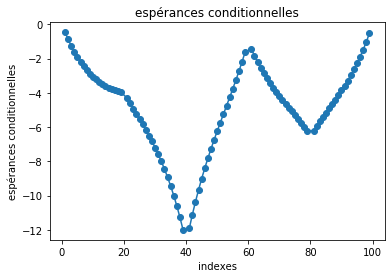

In [7]:
#5
esp_conditionnelle = np.array([mu for i in range(long)]).T + np.dot(np.dot(mat_cov_obs_unknown,np.linalg.inv(mat_cov_obs)),depth.T - np.array([mu for i in range(l)]).T)

plt.plot(unknown_indexes, esp_conditionnelle, marker = 'o')

plt.xlabel('indexes')
plt.ylabel('espérances conditionnelles')
plt.title('espérances conditionnelles')
plt.show()

No handles with labels found to put in legend.


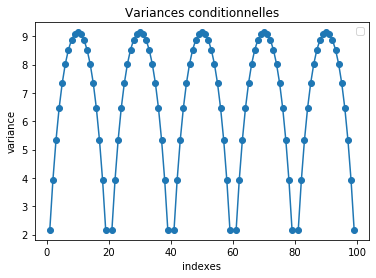

In [8]:
#6

# matrice de variance conditionnelle 
mat_cov_conditionnelle  = mat_cov_unknown -  np.dot(np.dot(mat_cov_obs_unknown,np.linalg.inv(mat_cov_obs)),mat_cov_obs_unknown.T)

#sa diagonale
diag_mat = np.array([mat_cov_conditionnelle[i,i] for i in range(long)])
plt.plot(unknown_indexes,diag_mat, marker = 'o')

plt.xlabel('indexes')
plt.ylabel('variance')
plt.title('Variances conditionnelles')
plt.legend()
plt.show()

La courbe obtenue a bien l'allure attendue : on obtient une variance presque périodique, qui semble tendre vers 0 lorsque l'on tend vers les points connus, et qui est maximale au milieu de l'intervalle entre deux points connus.(car les points connus ont moins d'influence sur les points les plus éloignés) De plus, la variance reste bien inférieure à $\sigma^2 = 12.5$, qui correspond à la variance avec aucune observation. (En effet on s'attend à ce que les informations diminues l'incertitude sur la profondeur des points inconnus)

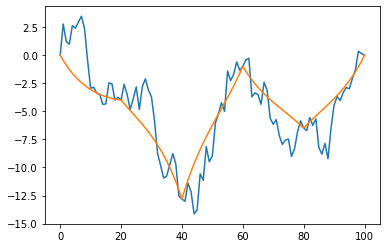

In [10]:
#7
def simulation():
    L = np.linalg.cholesky(mat_cov_conditionnelle)
    X = np.array([0. for i in range(long)])
    for k in range(long):
        X[k] = np.sqrt(-2*np.log(rd.random()))*np.cos(2*np.pi*rd.random())
    Y = esp_conditionnelle + np.dot(L,X)
    #ensuite on réorganise les indices pour obtenir le vecteur Z pour lequel les variables 
    #sont bien triées par ordre de position croissante.
    Z = np.array([0. for i in range(N)])
    for i in range(l):
        Z[observation_indexes[i]] = depth[i]
    for j in range(long):
        Z[unknown_indexes[j]] = Y[j]
    return(Z)

# Plot 

Z = simulation()

esp_tot = np.array([0. for i in range(N)]) #reconstruction des espérances conditionnelles + données
for i in range(l):
    esp_tot[observation_indexes[i]] = depth[i]
for j in range(long):
    esp_tot[unknown_indexes[j]] = esp_conditionnelle[j]
    
plt.plot(discretization_indexes, Z)
plt.plot(discretization_indexes, esp_tot)
plt.show()

In [11]:
#8 
def calcul_longueur(Z, Delta):
    L = 0
    N = len(Z)
    for i in range(1, N):
        L+= np.sqrt(Delta**2 + (Z[i] - Z[i-1])**2 )
    return L

In [12]:
#9 

#Esperance conditionnnelle simulée de la longueur
L_star, K = 0, 100
for loop in range(K):
    Z = simulation()
    L_star += calcul_longueur(Z, Delta)
L_star = L_star/K
print(f'L* = {L_star}')

#Longueur de l'espérance conditionnelle :
L_prime = 0

esp_tot = np.array([0.0 for i in range(N)]) #reconstruction des espérances
for i in range(l):
    esp_tot[observation_indexes[i]] = depth[i]
for j in range(long):
    esp_tot[unknown_indexes[j]] = esp_conditionnelle[j]

for i in range(1, N):
    L_prime += np.sqrt(Delta**2 + (esp_tot[i] - esp_tot[i-1])**2 )
print(f' L\' = {L_prime}')

L* = 522.492410872064
 L' = 501.6468416918411


In [13]:
# Borne inf de la longueur accessible :
L = 0 
for i in range(len(observation_indexes)-1):
    L+= np.sqrt( (Delta*(observation_indexes[i+1]-observation_indexes[i]))**2 + (depth[i+1] - depth[i])**2)
print(L)

501.52237767670647


Commentaire : la longueur de cable trouvée avec le calcul de L' est nettement plus faible car la courbe obtenue est très lisse, ce qui n'arrivera jamais avec la simulation du vecteur gaussien car on aura toujours des fluctuations importantes autour de l'espérance de certaines variables. Ainsi, dans la suite on retiendra le calcul de L*. Celui de L' n'est pas pertinent car cela correspond à une situation très peu probable. La valeur obtenue avec L' est très proche de la valeur minimale que l'on pourrait obtenir.

522.4750246697672


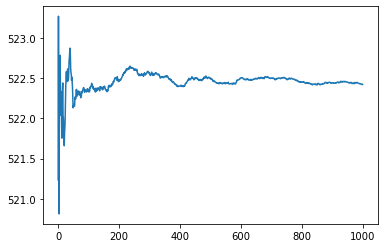

In [14]:
#10
def M(n):
    #suites des moyennes des longueurs jusqu'à n simulations
    L_star = 0
    L_star_tab = []
    for k in range(1, n+1):
        Z = simulation()
        L_star += calcul_longueur(Z, Delta)
        L_star_tab.append(L_star/k)
    return L_star_tab

print(M(1000)[-1])
X = [i for i in range(1000)]
plt.plot(X, M(1000))
plt.show()

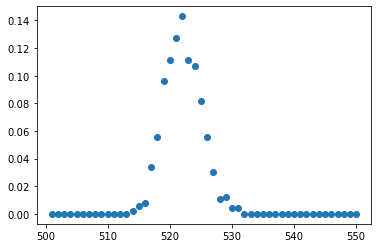

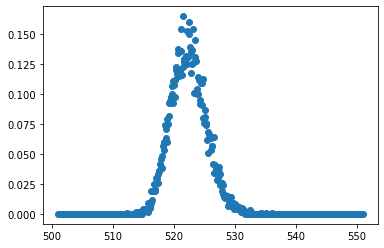

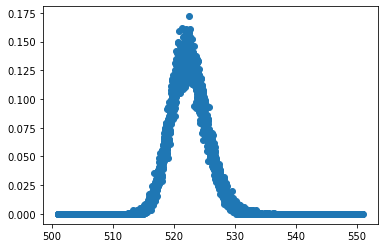

In [15]:
#11
def histogramme(n,pas):
    N = int(50/pas)
    y = [0. for k in range(N)]
    a = 1/(n*pas)
    for k in range(n):
        Z = simulation()
        resu = calcul_longueur(Z, Delta)
        rang = int((resu-501)/pas)
        y[rang] +=a
    x = [501+k*pas for k in range(N)]
    plt.plot(x,y,linestyle = "",marker = "o")
    plt.show()
    
#on discrétise les valeurs qui peuvent être prises pour la longueur,
#on crée une liste qui pour n simulations donne pour chaque indice k le nombre de simulations
#comprisent entre 501+k*pas et 501+(k+1)*pas.(on commence à 501m car on ne pourra pas avoir moins)
# On divise toutes les valeurs par le nombre n*pas pour obtenir une densité de probabilité.
#la courbe obtenue est une densité de probabilité
#pour que la courbe soit significative, il faut bien plus de simulations que de valeurs qui peuvent
#être prises ie on doit avoir n >> 50/pas

histogramme(1000,1)
histogramme(10000,0.1)
histogramme(100000,0.1)

In [ ]:
#12
#méthode 1: histogramme
def maximum(n):
    S = 0
    for k in range(n):
        Z = simulation()
        s = calcul_longueur(Z,Delta)
        if s>S:
            S = s
    return(S)

maximum(100000)

#On a besoin d'avoir une valeur majorante de la longueur du cable pour l'implémentation qui suit.
#On se contente d'une valeur qui peut être prise, mais qui est tellement peu probable qu'on
#peut considérer qu'elle ne sera pas excédée. En exécutant maximum sur 100 000 simulation 
#On ne dépasse pas les 540m donc on peut prendre 550m et considérer qu'on ne le dépassera pas.

def intervalle_de_confiance(n,pas):
    N = int(50/pas)
    l = [0 for k in range(N)]
    S = 0
    for k in range(n):
        Z = simulation()
        resu = calcul_longueur(Z, Delta)
        S += resu
        rang = int((resu-501)/pas)
        l[rang] +=1
    esperance = S/n
    rg_esp = int((esperance-501)/pas)
    M = l[rg_esp]
    k = 0
    while M/n < 0.95:
        k+=1
        M = M + l[rg_esp+k] + l[rg_esp-k]
    return((501+pas*(rg_esp-k),501+pas*(rg_esp+k)))

intervalle_de_confiance(1000,1)
intervalle_de_confiance(10000,0.1)
intervalle_de_confiance(100000,0.1)

#cette première méthode est basée sur l'histogramme en refaisant comme précédemment sauf que l'on
#calcule l'espérance au cours des n simulations plutôt que de le faire à part car on aurait
#une estimation de l'espérance basée sur d'autres simulations que celles qui permettent de calculer
#l'intervalle de confiance. On part de la moyenne et on élargit jusqu'à avoir 95% des simulations
#dedans.

#méthode 2 : approximation par une gaussienne

def intervalle_de_confiance2(n,pas):
    N = int(50/pas)
    y = [0. for k in range(N)]
    a = 1/(n*pas)
    S = 0
    for k in range(n):
        Z = simulation()
        resu = calcul_longueur(Z, Delta)
        S += resu
        rang = int((resu-501)/pas)
        y[rang] +=a
    esp = S/n
    rang_esp = int((esp-501)/pas)
    sigma = 1/(np.sqrt(2*np.pi)*y[rang_esp])
    return(esp-sigma*1.96,esp+sigma*1.96)

#On utilise la valeur de la densité de probabilité d'une gaussienne d'écart-type sigma  
#calculé en l'espérance pour obtenir sigma.On applique alors la formule donnant l'intervalle de 
#confiance à 95% pour une gaussienne.

intervalle_de_confiance2(1000,1)
intervalle_de_confiance2(10000,0.1)
intervalle_de_confiance2(100000,0.1)

In [ ]:
#13
def proba_525(n):
    S = 0
    for k in range(n):
        Z = simulation()
        if calcul_longueur(Z, Delta) >= 525:
            S +=1
    return(S/n)

proba(1000)
proba(10000)
proba(100000)